In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio

In [28]:
def read_data(name):
#     name="tr872"
    name_list = ["Step" , "Chain" , "Shake" , "Chi" , "Rama", "Excluded", "DSSP", "P_AP", "Water" ,"Burial", "Helix", "AMH_Go", "Frag_Mem", "Vec_FM", "Membrane", "SSB","VTotal"]


    location = f"/Users/weilu/Research/server/sep_2018/02_week/{name}/"
    RMSD = pd.read_table(location+"rmsd-angstrom.xvg", names=["i", "RMSD"], sep="\s+")
    bias = pd.read_table(location+"bias.log", names=["i", "biasQ", "bias"], sep="\s+").drop("i", axis=1)
    awsem = pd.read_table(location+"awsem.log", names=name_list)
    rw = pd.read_table(location+"rwplusScore.txt", names=["i", "Rw"], sep="\s+").drop("i", axis=1)
    raw_data = pd.concat([RMSD, rw, bias, awsem], axis=1)
    return raw_data.assign(name=name)

In [29]:
folder_list = ["tr862", "tr877", "tr872", "tr885", "tr866", "tr868", "tr884", "tr895", "tr896", "tr870", "tr921", "tr922", "tr891", "tr948"]
folder_list = ["tr862", "tr872", "tr885", "tr866", "tr868" , "tr895", "tr896", "tr870", "tr921", "tr891", "tr948"]
# "tr877","tr884", "tr922"

data_list = []
for name in folder_list:
    tmp = read_data(name)
    data_list.append(tmp)
raw_data_all = pd.concat(data_list)

In [30]:
def choose_top(data,col="RMSD", n=5, ascending=True):
    return data.assign(chosen=pd.DataFrame.rank(data[col], ascending=ascending, method='dense')<=n)

In [31]:
n = 20
raw_data_all = raw_data_all.reset_index(drop=True).groupby("name").apply(choose_top, n=n)

In [32]:
# train_name_list = ["tr872", "tr885", "tr948"]
# train_name_list = ["tr862", "tr872", "tr885", "tr866", "tr868" , "tr895", "tr896", "tr870", "tr921", "tr891", "tr948"]
train_name_list = ["tr866"]
# train_name_list = ["tr948"]
raw_data = raw_data_all.reset_index(drop=True).query(f'name in {train_name_list}')

In [33]:
raw_data.shape

(2505, 24)

In [34]:
raw_data_all.columns

Index(['i', 'RMSD', 'Rw', 'biasQ', 'bias', 'Step', 'Chain', 'Shake', 'Chi',
       'Rama', 'Excluded', 'DSSP', 'P_AP', 'Water', 'Burial', 'Helix',
       'AMH_Go', 'Frag_Mem', 'Vec_FM', 'Membrane', 'SSB', 'VTotal', 'name',
       'chosen'],
      dtype='object')

In [35]:
# name="tr872"
# name_list = ["Step" , "Chain" , "Shake" , "Chi" , "Rama", "Excluded", "DSSP", "P_AP", "Water" ,"Burial", "Helix", "AMH_Go", "Frag_Mem", "Vec_FM", "Membrane", "SSB","VTotal"]


# location = f"/Users/weilu/Research/server/sep_2018/02_week/{name}/"
# RMSD = pd.read_table(location+"rmsd-angstrom.xvg", names=["i", "RMSD"], sep="\s+")
# bias = pd.read_table(location+"bias.log", names=["i", "biasQ", "bias"], sep="\s+")
# awsem = pd.read_table(location+"awsem.log", names=name_list)
# rw = pd.read_table(location+"rwplusScore.txt", names=["i", "Rw"], sep="\s+").drop("i", axis=1)
# raw_data = pd.concat([RMSD, rw, bias, awsem], axis=1)
# n = 5
# raw_data = raw_data.assign(chosen=pd.DataFrame.rank(raw_data.RMSD, method='first')<=n)

In [36]:
raw_data.query("Step != 0")

,i,RMSD,Rw,biasQ,bias,Step,Chain,Shake,Chi,Rama,...,Burial,Helix,AMH_Go,Frag_Mem,Vec_FM,Membrane,SSB,VTotal,name,chosen
4902,39300.0,2.12626,-16868.795651,0.597493,32.4024,152000000,88.475752,0.0,30.730134,-436.514483,...,-101.612912,-6.802624,0.0,-738.987663,0.0,0.0,0.0,-1310.091653,tr866,False
4920,41100.0,2.36824,-16316.945931,0.597493,32.4024,152000000,88.475752,0.0,30.730134,-436.514483,...,-101.612912,-6.802624,0.0,-738.987663,0.0,0.0,0.0,-1310.091653,tr866,False


In [37]:
raw_data.head()

,i,RMSD,Rw,biasQ,bias,Step,Chain,Shake,Chi,Rama,...,Burial,Helix,AMH_Go,Frag_Mem,Vec_FM,Membrane,SSB,VTotal,name,chosen
2505,0.0,3.23637,-18113.750445,0.611015,30.261837,0,10.748810,0.0,1.219555,-411.990354,...,-100.022997,-5.783199,0.0,-722.416831,0.0,0.0,0.0,-1382.941162,tr866,False
2506,100.0,3.17862,-16908.884540,0.596365,32.584284,0,9.321727,0.0,0.792174,-427.300992,...,-100.846239,-4.644283,0.0,-725.297932,0.0,0.0,0.0,-1386.365034,tr866,False
2507,200.0,3.28087,-17018.179532,0.578606,35.514664,0,11.229412,0.0,1.102072,-423.686840,...,-100.857503,-4.551441,0.0,-719.994372,0.0,0.0,0.0,-1374.773270,tr866,False
2508,300.0,3.33421,-16951.810512,0.590004,33.619339,0,11.120068,0.0,1.178727,-432.781465,...,-99.977475,-4.110308,0.0,-725.642305,0.0,0.0,0.0,-1388.167260,tr866,False
2509,400.0,3.30271,-17276.455098,0.578927,35.460509,0,11.670419,0.0,0.938973,-425.186759,...,-99.247981,-2.873730,0.0,-722.911092,0.0,0.0,0.0,-1370.668733,tr866,False


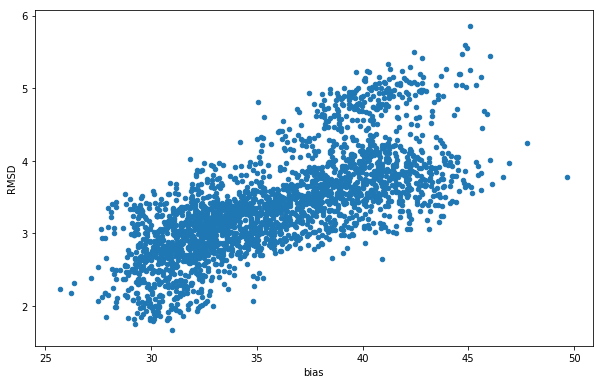

In [12]:
raw_data.plot.scatter("bias", "RMSD")

In [13]:
raw_data.query("VTotal > -500")

,i,RMSD,Rw,i,biasQ,bias,Step,Chain,Shake,Chi,...,Burial,Helix,AMH_Go,Frag_Mem,Vec_FM,Membrane,SSB,VTotal,name,chosen


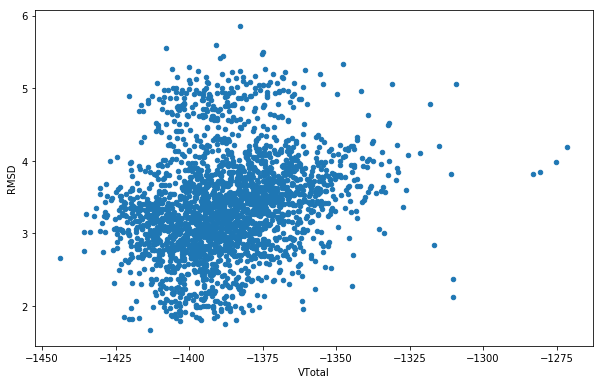

In [14]:
raw_data.plot.scatter("VTotal", "RMSD")

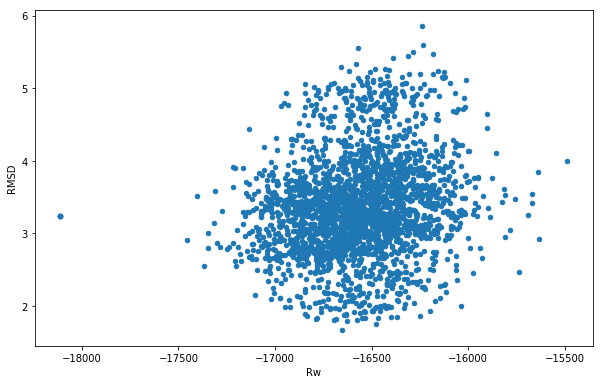

In [15]:
raw_data.plot.scatter("Rw", "RMSD")

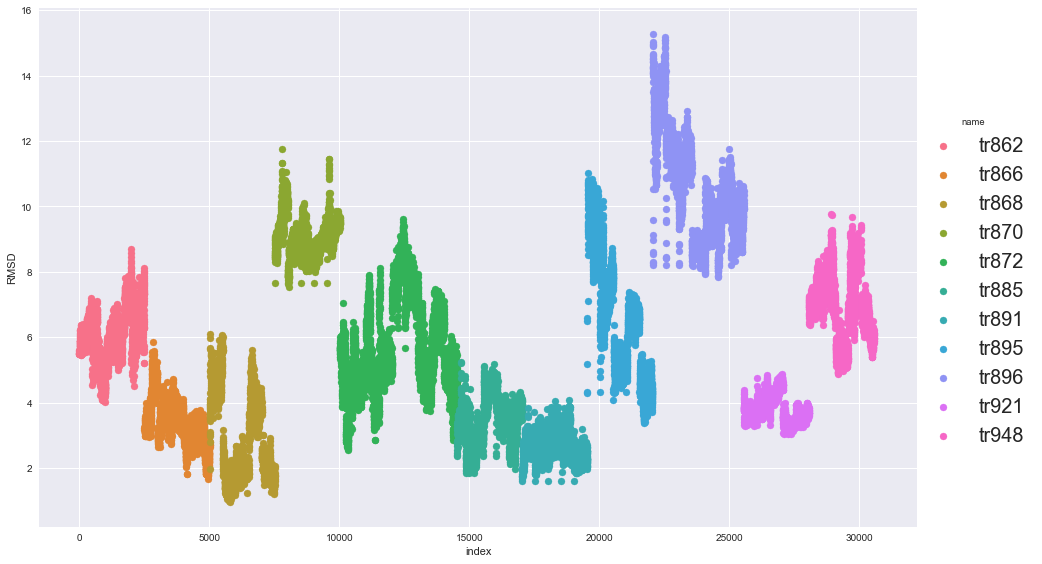

In [582]:
import seaborn as sns
# sns.set(rc={'figure.figsize':(20,30)})
# plt.figure(figsize=(15,8))
fg = sns.FacetGrid(data=raw_data.reset_index(), hue='name', size=8, aspect=1.63)
fg.map(plt.scatter, 'index', 'RMSD').add_legend(fontsize=20)

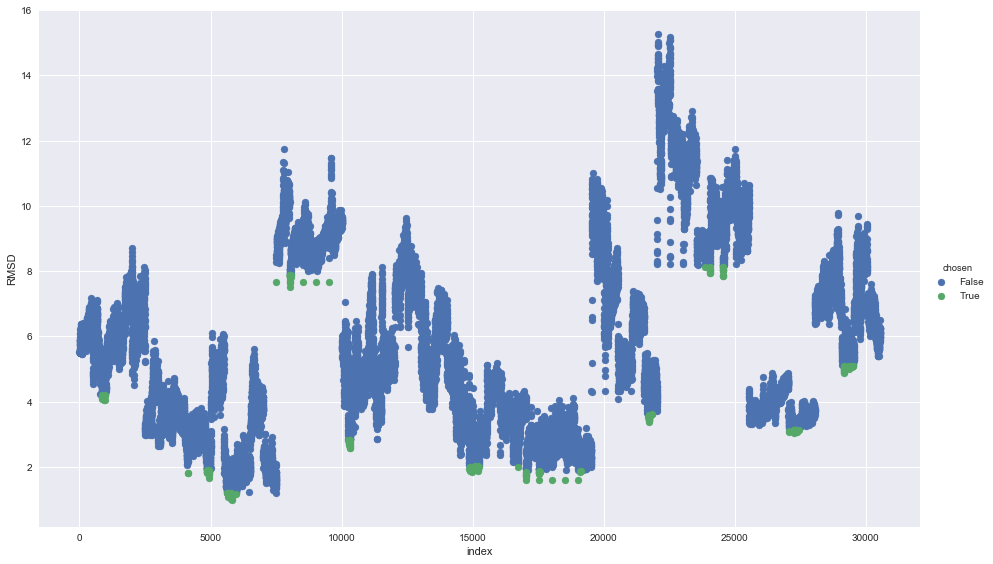

In [560]:
import seaborn as sns
# sns.set(rc={'figure.figsize':(20,30)})
# plt.figure(figsize=(15,8))
fg = sns.FacetGrid(data=raw_data.reset_index(), hue='chosen', size=8, aspect=1.63)
fg.map(plt.scatter, 'index', 'RMSD').add_legend()

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
def my_transform(data, label, degree, FEATURES):

    # LABEL = "Qw"
    LABEL = label
    PolynomialDegree = degree

    num_attribs = FEATURES
    cat_attribs = [LABEL]
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('std_scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
        ])
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs))
        ])

    full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cat_pipeline", cat_pipeline),
        ])
    return full_pipeline.fit_transform(data)


# FEATURES = ["eigenvalues", "entropy", "pca"]
# FEATURES = ["eigenvalues", "entropy", "diffRMSD"]
# FEATURES = ["eigenvalues", "entropy"]
FEATURES = ["bias",
    'Rw',
     'VTotal',
#     'RMSD', # test
#      'Burial',
#      'Water',
#      'Rama',
#      'DSSP',
#      'P_AP',
#      'Helix',
#      'Frag_Mem'
               ]
# FEATURES = ["eigenvalues"]
# LABEL = "diffRMSD"
# LABEL = "RMSD"
LABEL = "chosen"
DEGREE = 1

def pred_from_raw(a):
    data = my_transform(a, label=LABEL, degree=DEGREE, FEATURES=FEATURES)
    test_y = data[:,-1]
    test_set = data[:,:-1]
    prob= clf.predict_proba(test_set)[:,1]
    return a.assign(prob=prob)

In [40]:
# data = my_transform(raw_data, label=LABEL, degree=DEGREE, FEATURES=FEATURES)
data = raw_data.groupby('name').apply(my_transform, label=LABEL, degree=DEGREE, FEATURES=FEATURES)[0]
train_y = data[:,-1]
train_set = data[:,:-1]
from sklearn import svm
p = 0.1
# clf = svm.SVC(probability=True)
clf = LogisticRegression(random_state=142, class_weight={0:p, 1:(1-p)})
clf.fit(train_set, train_y)
y_pred_svm = clf.predict(train_set)

In [41]:
clf.predict(train_set).sum()

3.0

In [42]:
prob= clf.predict_proba(train_set)[:,1]
position_of_top_n = prob.argsort()[-n:][::-1]
threshold = prob[position_of_top_n][-1]
predict_y = np.zeros(len(train_y),)
predict_y[position_of_top_n] = 1

In [43]:
confusion_matrix(train_y, predict_y)

array([[2466,   19],
       [  19,    1]])

In [44]:
raw_data_all = raw_data_all.reset_index(drop=True).groupby("name").apply(pred_from_raw).reset_index(drop=True)

In [53]:
best = raw_data_all.groupby("name").apply(choose_top, col="RMSD"
                                            , n=5, ascending=True).reset_index(drop=True).query("chosen==True")

In [46]:
picked = raw_data_all.groupby("name").apply(choose_top, col="prob"
                                            , n=5, ascending=False).reset_index(drop=True).query("chosen==True")

In [49]:
init = raw_data_all.query("i == 0.0")

In [51]:
all_results = pd.concat([best.assign(result='best'), 
                         picked.assign(result='picked'), init.assign(result='init')])

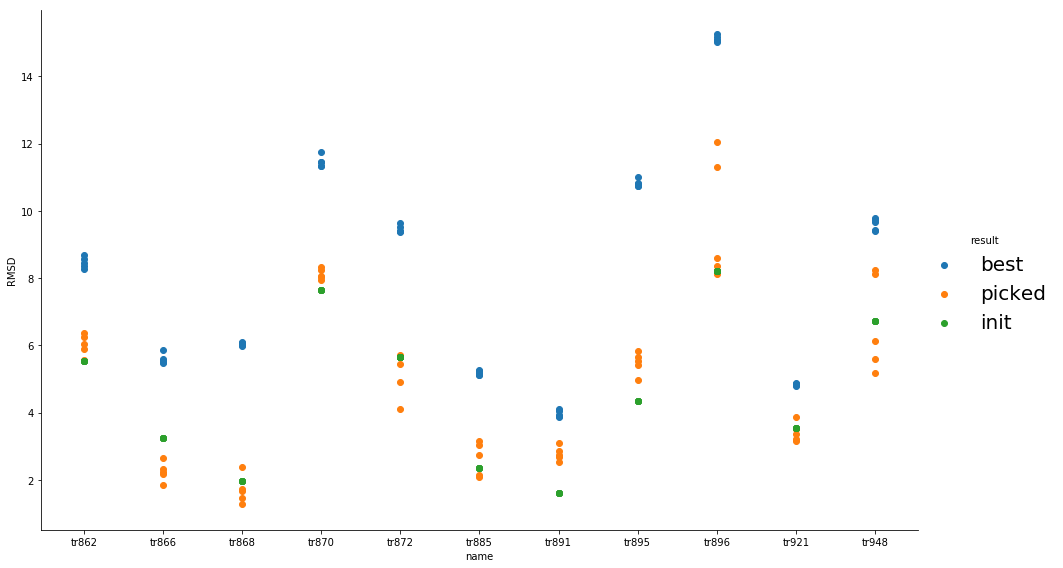

In [52]:
import seaborn as sns
# sns.set(rc={'figure.figsize':(20,30)})
# plt.figure(figsize=(15,8))
fg = sns.FacetGrid(data=all_results.reset_index(), hue='result', height=8, aspect=1.63)
fg.map(plt.scatter, 'name', 'RMSD').add_legend(fontsize=20)

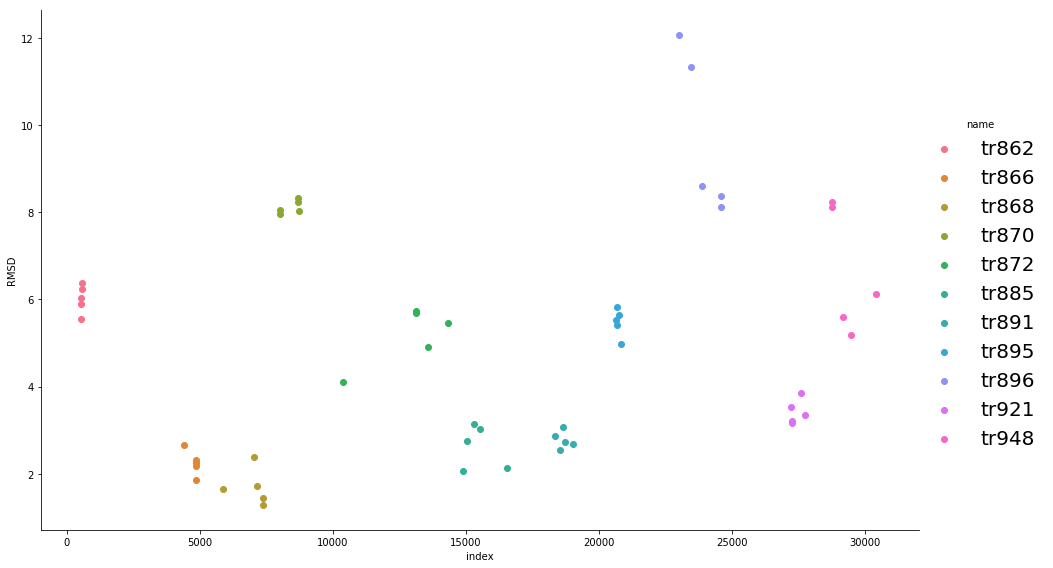

In [27]:
import seaborn as sns
# sns.set(rc={'figure.figsize':(20,30)})
# plt.figure(figsize=(15,8))
fg = sns.FacetGrid(data=picked.reset_index(), hue='name', height=8, aspect=1.63)
fg.map(plt.scatter, 'index', 'RMSD').add_legend(fontsize=20)

In [44]:
top_n = 20
pred_list = []
for a, raw in raw_data_all.reset_index(drop=True).groupby("name"):
    print(a)
    data = my_transform(raw, label=LABEL, degree=DEGREE, FEATURES=FEATURES)
    test_y = data[:,-1]
    test_set = data[:,:-1]
#     print("svm mean square error:", np.sum((test_y-y_pred_svm)**2)/len(test_y))
    
    prob= clf.predict_proba(test_set)[:,1]
    raw["prob"] = prob
    position_of_top_n = prob.argsort()[-top_n:][::-1]
    threshold = prob[position_of_top_n][-1]
    predict_y = np.zeros(len(test_y),)
    predict_y[position_of_top_n] = 1
#     predict_y = clf.predict(test_set)
    print(confusion_matrix(test_y, predict_y))

tr862
[[2466   19]
 [  19    1]]
tr866
[[2466   19]
 [  19    1]]
tr868
[[2465   20]
 [  20    0]]
tr870
[[2461   20]
 [  24    0]]
tr872
[[4469   20]
 [  20    0]]
tr885

/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_


[[2465   20]
 [  20    0]]
tr891
[[2462   19]
 [  23    1]]
tr895
[[2465   20]
 [  20    0]]
tr896
[[3468   19]
 [  19    1]]
tr921
[[2465   20]
 [  20    0]]
tr948
[[2460   20]
 [  20    0]]


/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

mean square error: 0.00798403193613


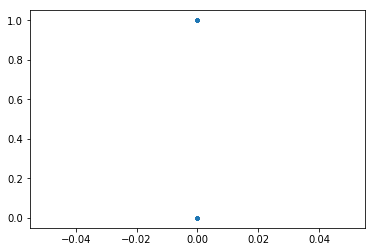

In [43]:
plt.plot(y_pred_svm, train_y, ".")
print("mean square error:", np.sum((train_y-y_pred_svm)**2)/len(y_pred_svm))

In [245]:
data.shape

(4509, 4)

In [246]:
train_y.shape

(4509,)

In [247]:
y_pred_svm.shape

(4509,)

In [248]:
y_pred_svm.shape

(4509,)

mean square error: 1.2008104586


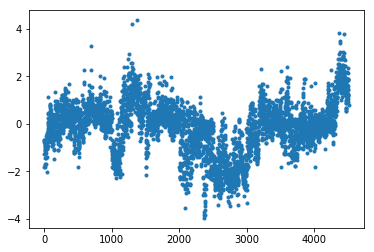

In [249]:
plt.plot(y_pred_svm-train_y, ".")
print("mean square error:", np.sum((train_y-y_pred_svm)**2)/len(y_pred_svm))

In [250]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


lin_reg.fit(train_set, train_y)
y_pred = lin_reg.predict(train_set)

mean square error: 1.24828941534


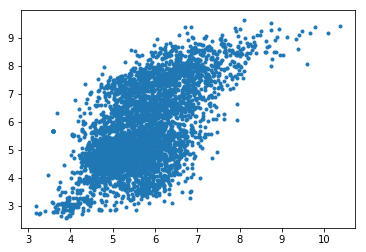

In [251]:
plt.plot(y_pred, train_y, ".")
print("mean square error:", np.sum((train_y-y_pred)**2)/len(y_pred))

mean square error: 1.24828941534


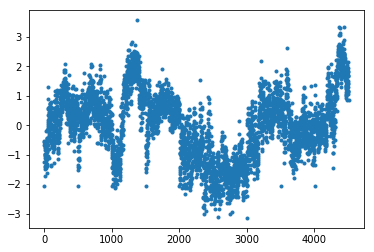

In [252]:
plt.plot(y_pred-train_y, ".")
print("mean square error:", np.sum((train_y-y_pred)**2)/len(y_pred))

In [255]:
for name, raw in raw_data_all.groupby("name"):
    print(name)
    data = my_transform(raw, label=LABEL, degree=DEGREE, FEATURES=FEATURES)
    test_y = data[:,-1]
    test_set = data[:,:-1]
    y_pred_svm = clf.predict(test_set)
#     print("svm mean square error:", np.sum((test_y-y_pred_svm)**2)/len(test_y))
    y_pred = lin_reg.predict(test_set)
    print("linear mean square error:", np.sum((test_y-y_pred)**2)/len(test_y))

tr862
linear mean square error: 1.49723410055
tr866
linear mean square error: 5.98538431515
tr868
linear mean square error: 9.02355704396
tr870
linear mean square error: 11.8755754536
tr872
linear mean square error: 1.24828941534
tr885
linear mean square error: 5.61811245228
tr891
linear mean square error: 9.92526421
tr895
linear mean square error: 3.23645241068
tr896
linear mean square error: 24.410818636
tr921
linear mean square error: 4.28738563158
tr948
linear mean square error: 2.49373343177


In [254]:
for name, raw in raw_data_all.groupby("name"):
    print(name)
    data = my_transform(raw, label=LABEL, degree=DEGREE, FEATURES=FEATURES)
    test_y = data[:,-1]
    test_set = data[:,:-1]
    y_pred_svm = clf.predict(test_set)
    print("svm mean square error:", np.sum((test_y-y_pred_svm)**2)/len(test_y))
    y_pred = lin_reg.predict(test_set)
    print("linear mean square error:", np.sum((test_y-y_pred)**2)/len(test_y))

tr862
svm mean square error: 1.72174477408
linear mean square error: 1.49723410055
tr866
svm mean square error: 6.20499917353
linear mean square error: 5.98538431515
tr868
svm mean square error: 8.5947418306
linear mean square error: 9.02355704396
tr870
svm mean square error: 12.8842316427
linear mean square error: 11.8755754536
tr872
svm mean square error: 1.2008104586
linear mean square error: 1.24828941534
tr885
svm mean square error: 5.62054361252
linear mean square error: 5.61811245228
tr891
svm mean square error: 9.49002608182
linear mean square error: 9.92526421
tr895
svm mean square error: 3.39272367709
linear mean square error: 3.23645241068
tr896
svm mean square error: 25.9000515954
linear mean square error: 24.410818636
tr921
svm mean square error: 4.88728819291
linear mean square error: 4.28738563158
tr948
svm mean square error: 2.86872645287
linear mean square error: 2.49373343177


In [215]:
for name, raw in raw_data_all.groupby("name"):
    print(name)
    data = my_transform(raw, label=LABEL, degree=1, FEATURES=FEATURES)
    test_y = data[:,-1]
    test_set = data[:,:-1]
    y_pred_svm = clf.predict(test_set)
    print("svm mean square error:", np.sum((test_y-y_pred_svm)**2)/len(test_y))
    y_pred = lin_reg.predict(test_set)
    print("linear mean square error:", np.sum((test_y-y_pred)**2)/len(test_y))

tr862
svm mean square error: 1.72174477408
linear mean square error: 1.49723410055
tr866
svm mean square error: 6.20499917353
linear mean square error: 5.98538431515
tr868
svm mean square error: 8.5947418306
linear mean square error: 9.02355704396
tr870
svm mean square error: 12.8842316427
linear mean square error: 11.8755754536
tr872
svm mean square error: 1.2008104586
linear mean square error: 1.24828941534
tr885
svm mean square error: 5.62054361252
linear mean square error: 5.61811245228
tr891
svm mean square error: 9.49002608182
linear mean square error: 9.92526421
tr895
svm mean square error: 3.39272367709
linear mean square error: 3.23645241068
tr896
svm mean square error: 25.9000515954
linear mean square error: 24.410818636
tr921
svm mean square error: 4.88728819291
linear mean square error: 4.28738563158
tr948
svm mean square error: 2.86872645287
linear mean square error: 2.49373343177


In [96]:
cutoff = 10
a = pd.DataFrame(y_pred, columns=["pred"])
a["large"] = a["pred"].rank(method="first") <= cutoff

b = pd.DataFrame(train_y, columns=["train"])
b["gt"] = b["train"].rank(method="first") <= cutoff # ground truth

In [97]:
picked = pd.concat([a,b], axis=1).query("large == True and gt == True")
print("out of the top 10, picked out ", picked.shape[0])

out of the top 10, picked out  2


In [98]:
picked = pd.concat([a,b], axis=1).query("large == True and gt == True")
print("out of the top 10, picked out ", picked.shape[0])

out of the top 10, picked out  2


In [252]:
picked.sum()

pred    -1.596755
large    8.000000
train   -1.629867
gt       8.000000
dtype: float64

In [221]:
pd.concat([a,b], axis=1).sum()

pred     -4.31886
large    10.00000
train    -4.31886
gt       10.00000
dtype: float64

In [194]:
pd.concat([a,b], axis=1).query("large == True")

,pred,large,train,gt
0,-0.757080,True,-0.814549,True
1,-0.399522,True,-0.457784,True
2,-0.323967,True,-0.095139,True
3,-0.237361,True,-0.559770,True
4,-0.188904,True,-0.168058,True
5,-0.174447,True,-0.013000,False
6,-0.152443,True,-0.028691,False
7,-0.141327,True,-0.006070,False
8,-0.110571,True,-0.096960,True
9,-0.097252,True,-0.565082,True


In [195]:
picked.sum()

pred    -2.114658
large    7.000000
train   -2.757341
gt       7.000000
dtype: float64

In [165]:
i = 2
diffRMSD = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/diffRMSD.txt", names=["diffRMSD"], sep="\s+")
eigenvalues = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/eigenvalues.txt", names=["eigenvalues"], sep="\s+")
entropy = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/entropy.txt", names=["entropy"], sep="\s+")
pca = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/std.PCA.txt", names=["pca"], sep="\s+")
raw_data_2 = pd.concat([eigenvalues, entropy, pca, diffRMSD], axis=1)

In [166]:
data_2 = my_transform(raw_data, label=LABEL, degree=1, FEATURES=FEATURES)

In [167]:
test_y = data_2[:,-1]
test_set = data_2[:,:-1]

y_pred = lin_reg.predict(train_set)


In [168]:
data_2

array([[  6.74157155e+00,   1.67029682e-02,  -1.31131000e-01],
       [  6.24683413e+00,  -4.61862619e+00,  -7.36925000e-02],
       [  4.63557806e+00,  -3.54300231e-01,  -4.41102000e-02],
       [  4.28502428e+00,  -1.91024887e+00,  -4.68995000e-03],
       [  3.92727394e+00,   1.08402967e+00,  -3.46758000e-02],
       [  3.58305324e+00,   9.74195694e-01,  -2.50843000e-02],
       [  3.26352572e+00,   2.06149694e-01,  -1.01665000e-02],
       [  3.18244367e+00,   3.88927742e-01,  -6.82601000e-05],
       [  2.91077060e+00,   4.19328449e-01,  -9.05235000e-05],
       [  2.76889872e+00,   7.60120407e-02,  -5.62739000e-02],
       [  2.62258098e+00,   1.23791533e+00,  -1.53555000e-02],
       [  2.43144532e+00,  -9.26596297e-02,  -6.22972000e-04],
       [  2.34912812e+00,   1.44628764e+00,  -4.32242000e-02],
       [  2.08882973e+00,   2.72636079e-01,  -8.62511000e-02],
       [  2.07284963e+00,   5.23852719e-01,  -5.44797000e-04],
       [  2.03651007e+00,  -9.45072730e-02,  -4.2956600